<a href="https://colab.research.google.com/github/cow-coding/School-Project/blob/master/Computer%20Science/Artificial%20Intelligence/MNIST/CNN/CNN_MNIST_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [37]:
import tensorflow as tf
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout
from keras import Sequential
from keras import optimizers
import tensorflow.nn as nn
import numpy as np
import matplotlib.pyplot as plt

device = tf.test.gpu_device_name()

if device != '/device:GPU:0':
  raise SystemError('GPU device not found')

print('Found GPU at: {}'.format(device))

Found GPU at: /device:GPU:0


# valriable setting

In [ ]:
batch_size_train = 64
batch_size_val = 64
batch_size_test = 1000

learning_rate = 0.01

# Data load & reshaping & normalization

In [8]:
mnist_data = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist_data.load_data()

x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)

x_train, x_test = x_train / 255.0, x_test / 255.0

print(len(x_train), len(x_test))

60000 10000


## Data Check

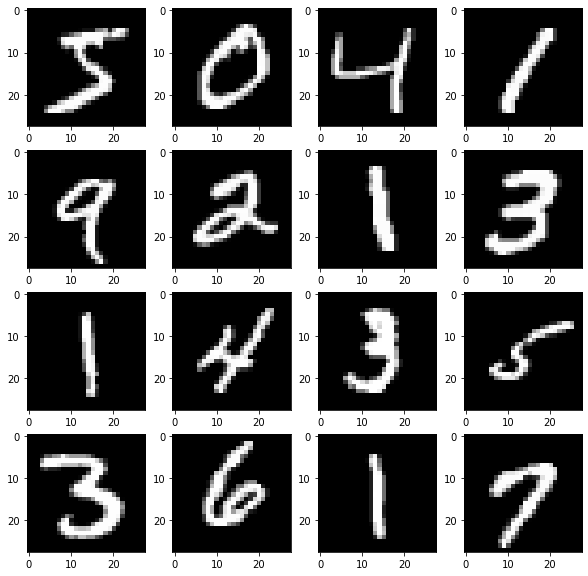

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7]


In [10]:
plt.figure(figsize=(10, 10))

for c in range(16):
  plt.subplot(4, 4, c+1)
  plt.imshow(x_train[c].reshape(28, 28), cmap='gray')

plt.show()
print(y_train[:16])

# Modeling

In [39]:
model = Sequential([
    Conv2D(input_shape=(28, 28, 1), kernel_size=3, filters=32),
    MaxPool2D(strides=2),
    Conv2D(kernel_size=3, filters=64),
    MaxPool2D(strides=2),
    Conv2D(kernel_size=3, filters=128),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model.compile(optimizer=optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_3 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)              

## Training

In [40]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.25)

Epoch 1/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3675 - accuracy: 0.8828 - val_loss: 0.0759 - val_accuracy: 0.9773
Epoch 2/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.0782 - accuracy: 0.9754 - val_loss: 0.0752 - val_accuracy: 0.9783
Epoch 3/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.0671 - accuracy: 0.9802 - val_loss: 0.0592 - val_accuracy: 0.9838
Epoch 4/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.0572 - accuracy: 0.9828 - val_loss: 0.0607 - val_accuracy: 0.9837
Epoch 5/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.0551 - accuracy: 0.9825 - val_loss: 0.0611 - val_accuracy: 0.9835
Epoch 6/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.0487 - accuracy: 0.9855 - val_loss: 0.0634 - val_accuracy: 0.9844
Epoch 7/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.0395 - accuracy: 0.9873 - val_loss: 0.0620 - val_accuracy:

# Evaluation

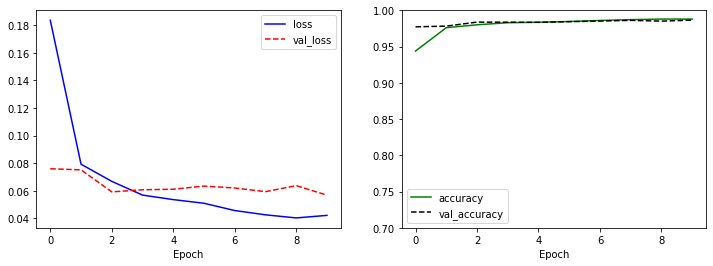

In [41]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [42]:
eval = model.evaluate(x_test, y_test)

print("Accuracy : %0.4f" %eval[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0459 - accuracy: 0.9890
Accuracy : 0.9890
